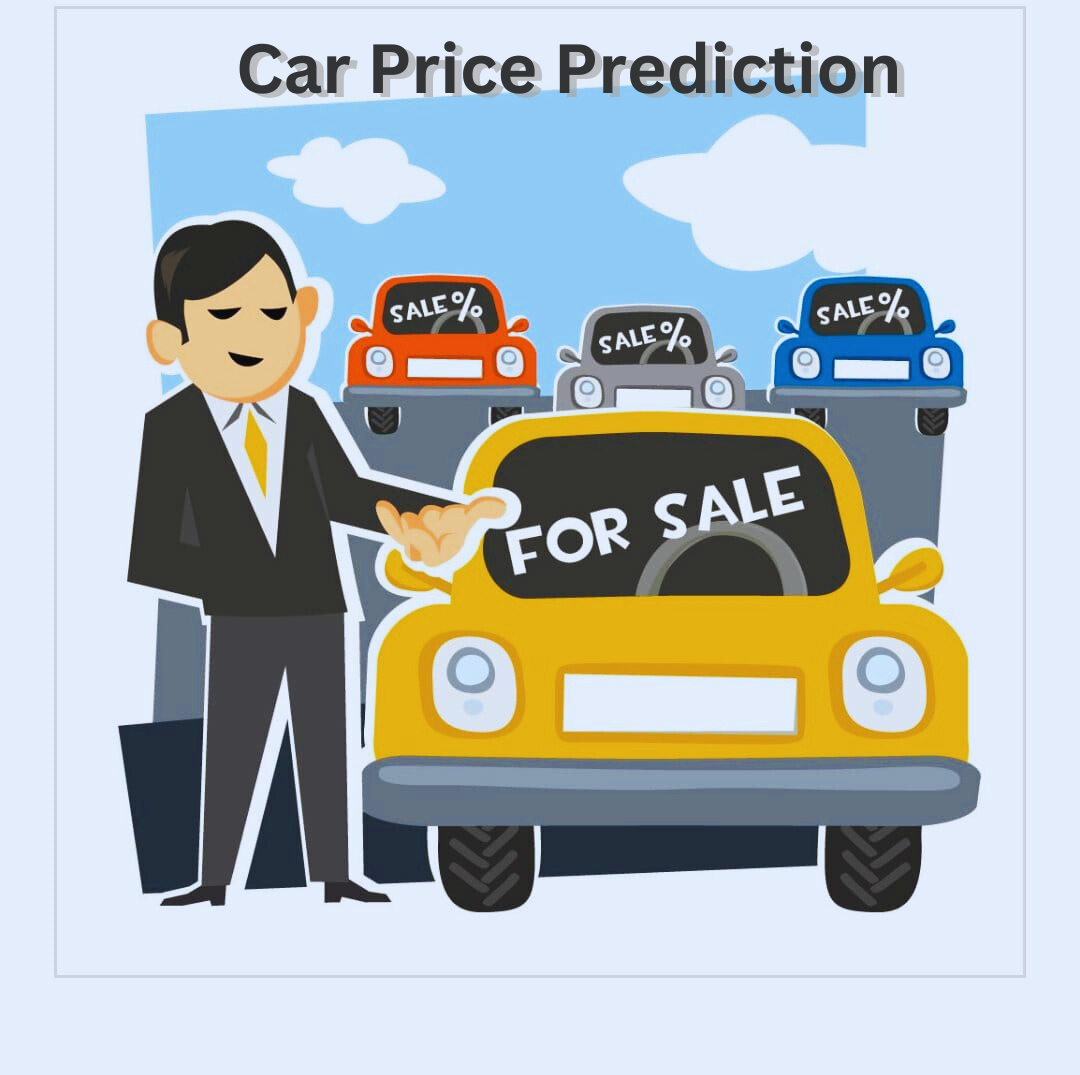

## The columns in the given dataset are as follows:

The brief description of each columns in the dataset:

- 1) **Name**: The name of the car model.

- 2) **Year**: The manufacturing year of the car. This column indicates the year in which the car was originally produced.

- 3) **Selling Price**: The price at which the car is being sold. This is typically the amount the seller is asking for the vehicle.

- 4) **Kilometers Driven**: The total distance in kilometers that the car has been driven. This provides an insight into the usage and potential wear and tear of the vehicle.

- 5) **Fuel**: The type of fuel the car uses for propulsion. Common values could be "Petrol," "Diesel," "CNG" (Compressed Natural Gas), "Electric," etc.

- 6) **Seller Type**: This indicates the type of seller. It might include values like "Individual" (private seller) or "Dealer" (car dealership).

- 7) **Transmission**: The type of transmission the car has. It could be "Manual" or "Automatic," referring to the manual or automatic control of gears.

- 8) **Owner**: This column describes the number of previous owners the car has had. It's often represented as a number, such as 1st owner, 2nd owner, etc. It gives an idea of how extensively the car has been used.

These columns provide essential information about each car in the dataset and can be used for various analyses, such as predicting car prices, understanding market trends, and making recommendations to potential buyers or sellers.






# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
car=pd.read_csv('car data.csv')

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

- 301 Rows and 9 Columns

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Visualization

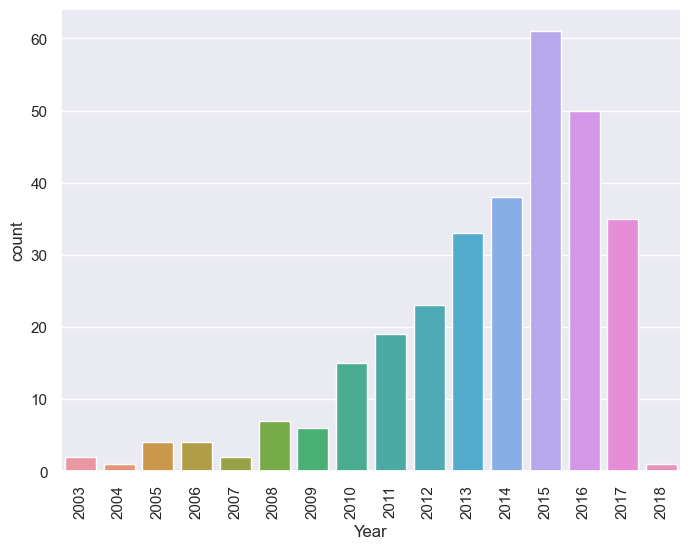

In [7]:
# car count based on year
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=car, x=car['Year'])
ax.tick_params(axis='x', rotation=90)

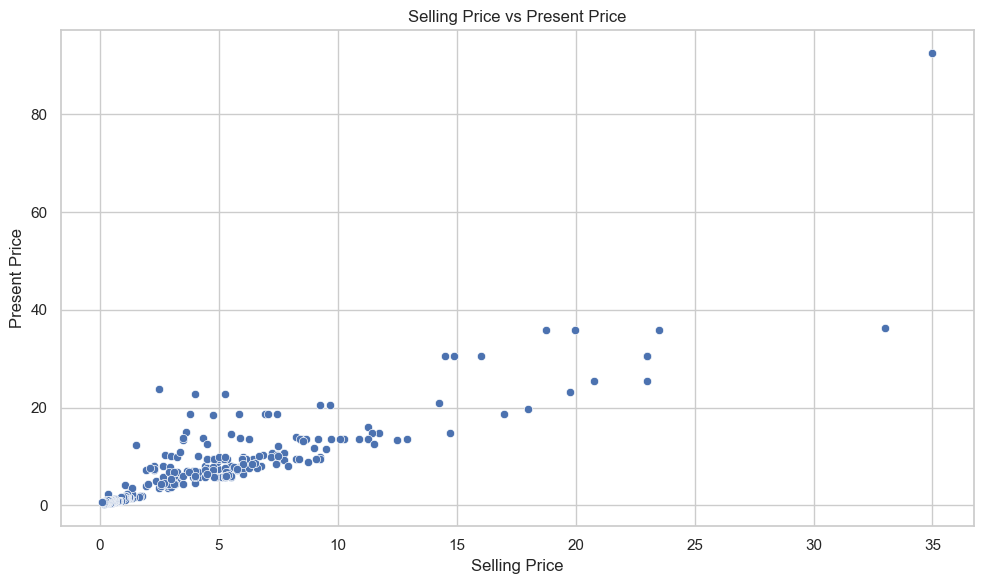

In [8]:
sns.set(style="whitegrid")

# Selling Price vs Present Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car, x='Selling_Price', y='Present_Price')
plt.title('Selling Price vs Present Price')
plt.xlabel('Selling Price')
plt.ylabel('Present Price')
plt.tight_layout()
plt.show()

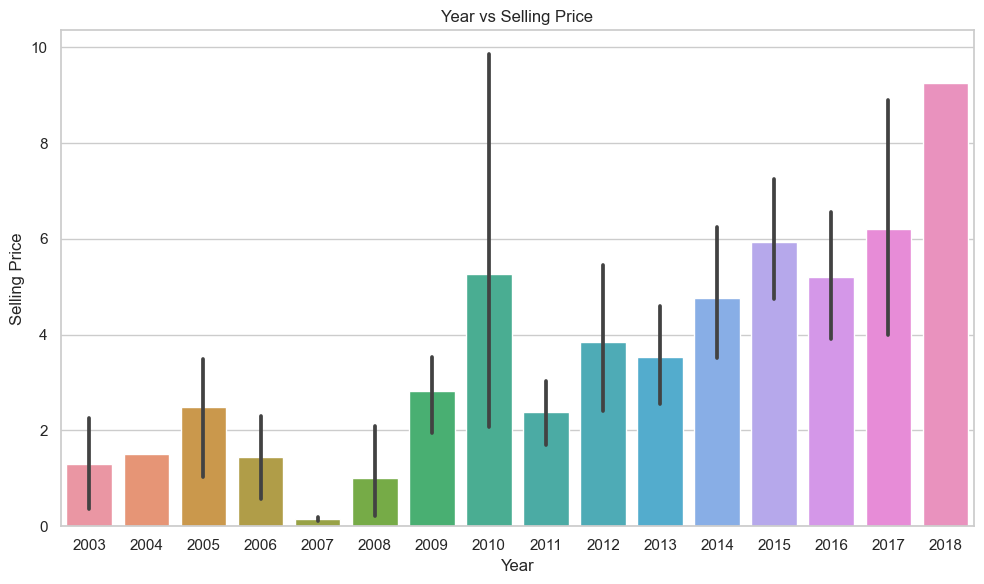

In [9]:
# Year vs Selling Price
plt.figure(figsize=(10, 6))
sns.barplot(data=car, x='Year', y='Selling_Price')
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

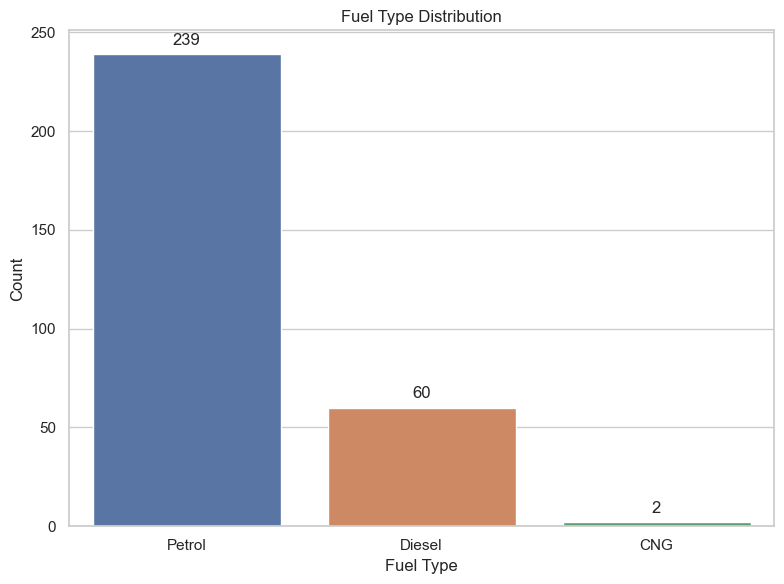

In [10]:
sns.set(style="whitegrid")

# Fuel Type Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=car, x='Fuel_Type')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

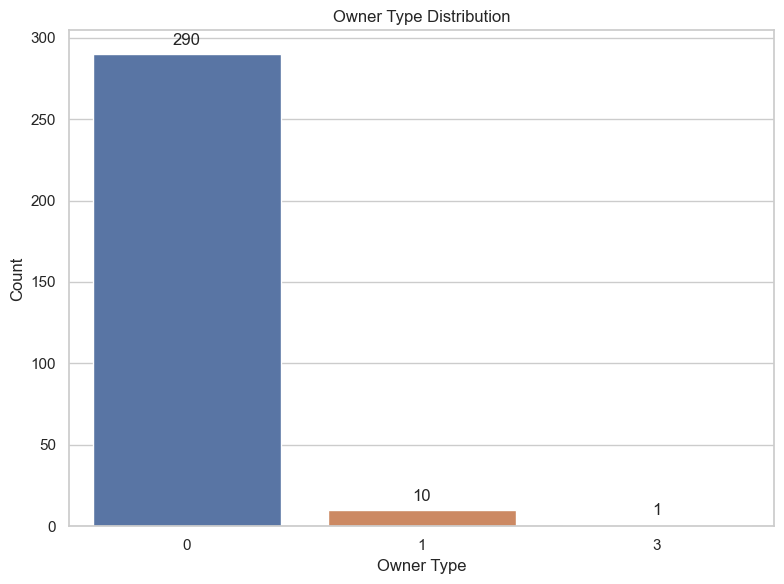

In [11]:
# Owner Type Distribution

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=car, x='Owner')
plt.title('Owner Type Distribution')
plt.xlabel('Owner Type')
plt.ylabel('Count')

# Add count numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Data Preprocessing

### 1) Checking Missing Values 

In [12]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

- There is not any missing values

In [13]:
num_lst = []  # list of Numerical columns

for i in car:
    if car[i].dtype != object:
        num_lst.append(i)
        
num_lst.remove('Selling_Price')

In [14]:
num_lst

['Year', 'Present_Price', 'Kms_Driven', 'Owner']

In [15]:
obj_lst=[]                      # list of Object Columns
for i in car:
    if car[i].dtype==object:
        obj_lst.append(i)

In [16]:
obj_lst

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [17]:
car.duplicated().sum()          # Check Duplicate values 

2

In [18]:
car.drop_duplicates(keep=False, inplace=True)   # Drop the Duplicate values

In [19]:
car.shape

(297, 9)

In [20]:
car['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

## Handling Outlier

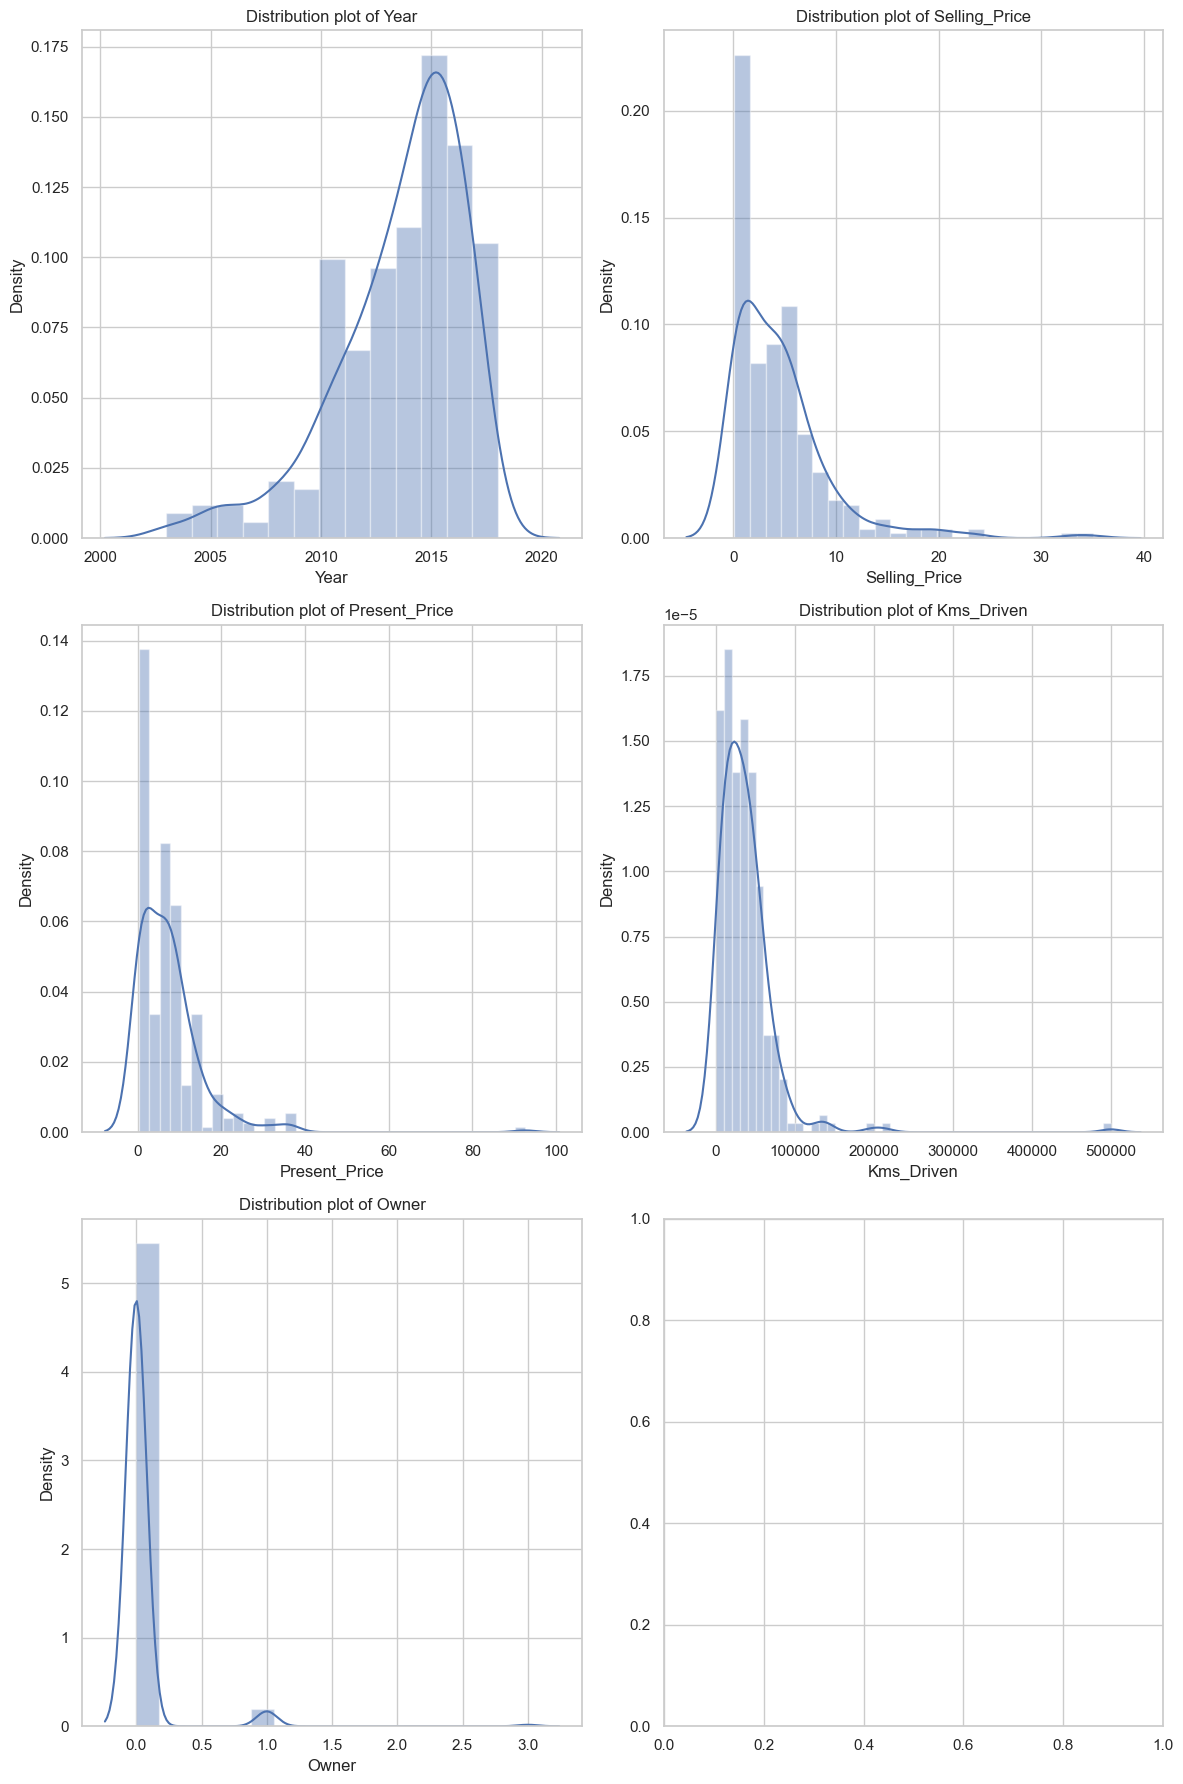

In [21]:
#Distribution plots 

def distplot(car, col):       
    if df[col].dtype in [int, float]:
        sns.distplot(car[col])
        plt.title(f'Distribution plot of {col}')
        plt.show()
    else:
        print(f"{col} is not a numeric column. Skipping...")

# Display distribution plots using subplots in two rows
num_columns = [col for col in car.columns if car[col].dtype in [int, float]]
num_plots = len(num_columns)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

for i, col in enumerate(num_columns):
    row = i // 2
    col = i % 2
    sns.distplot(car[num_columns[i]], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution plot of {num_columns[i]}')

plt.tight_layout()
plt.show()

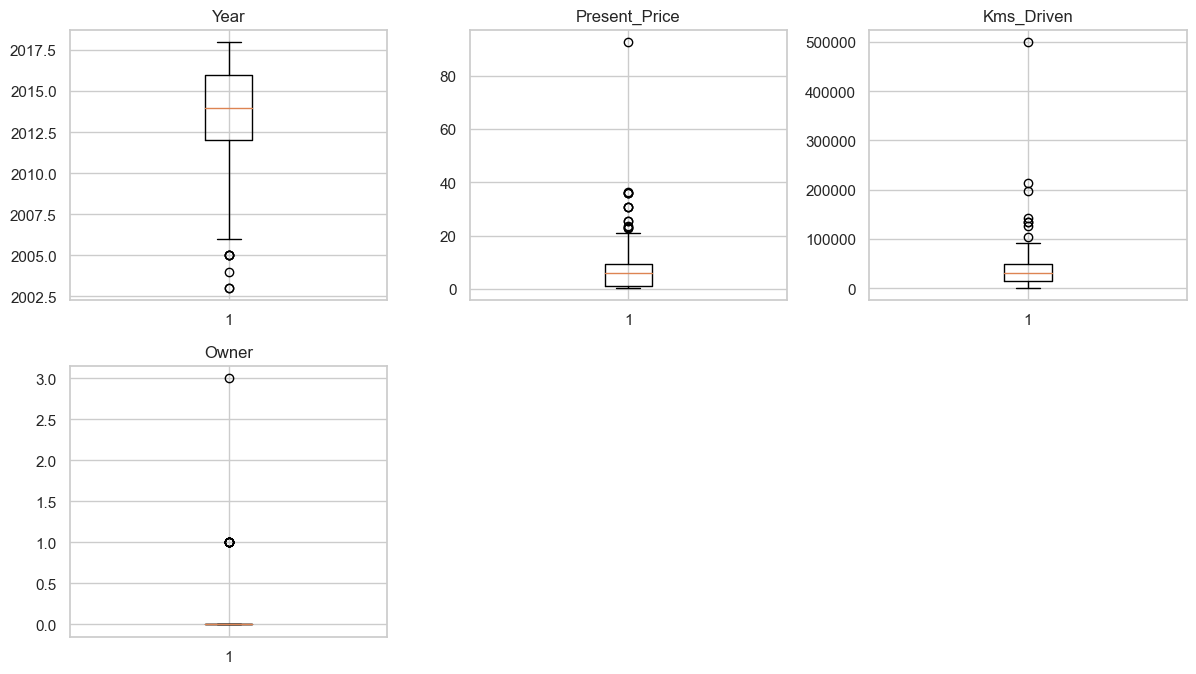

In [22]:
#boxplot 

plt.figure(figsize=(12,10),dpi=100)

if 'selling price' in num_lst:
    num_lst.remove('selling price')

for i,j in enumerate(num_lst):
    
    plt.subplot(3,3,i+1)
    plt.boxplot(car[j])
    plt.title(j)
    plt.tight_layout()
    #plt.show()

In [23]:
def cap_outlier(col):
    
    q3=car[col].quantile(0.75)
    q1=car[col].quantile(0.25)
    
    iqr=q3-q1
    
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    
    car[col].clip(lower,upper,inplace=True)

In [24]:
for i in num_lst:
    cap_outlier(i)

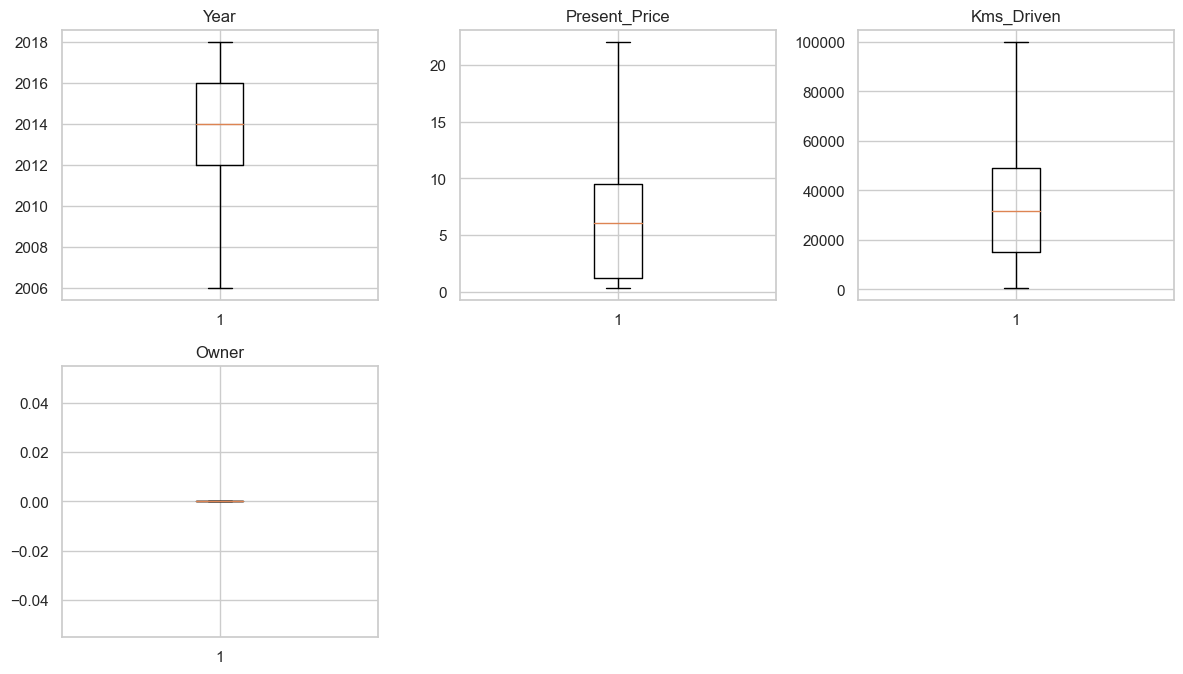

In [25]:
# after removing outliers

plt.figure(figsize=(12,10),dpi=100)

if 'selling price' in num_lst:
    num_lst.remove('selling price')
    
for i,j in enumerate(num_lst):
    
    plt.subplot(3,3,i+1)
    plt.boxplot(car[j])
    plt.title(j)
    plt.tight_layout()
    #plt.show()

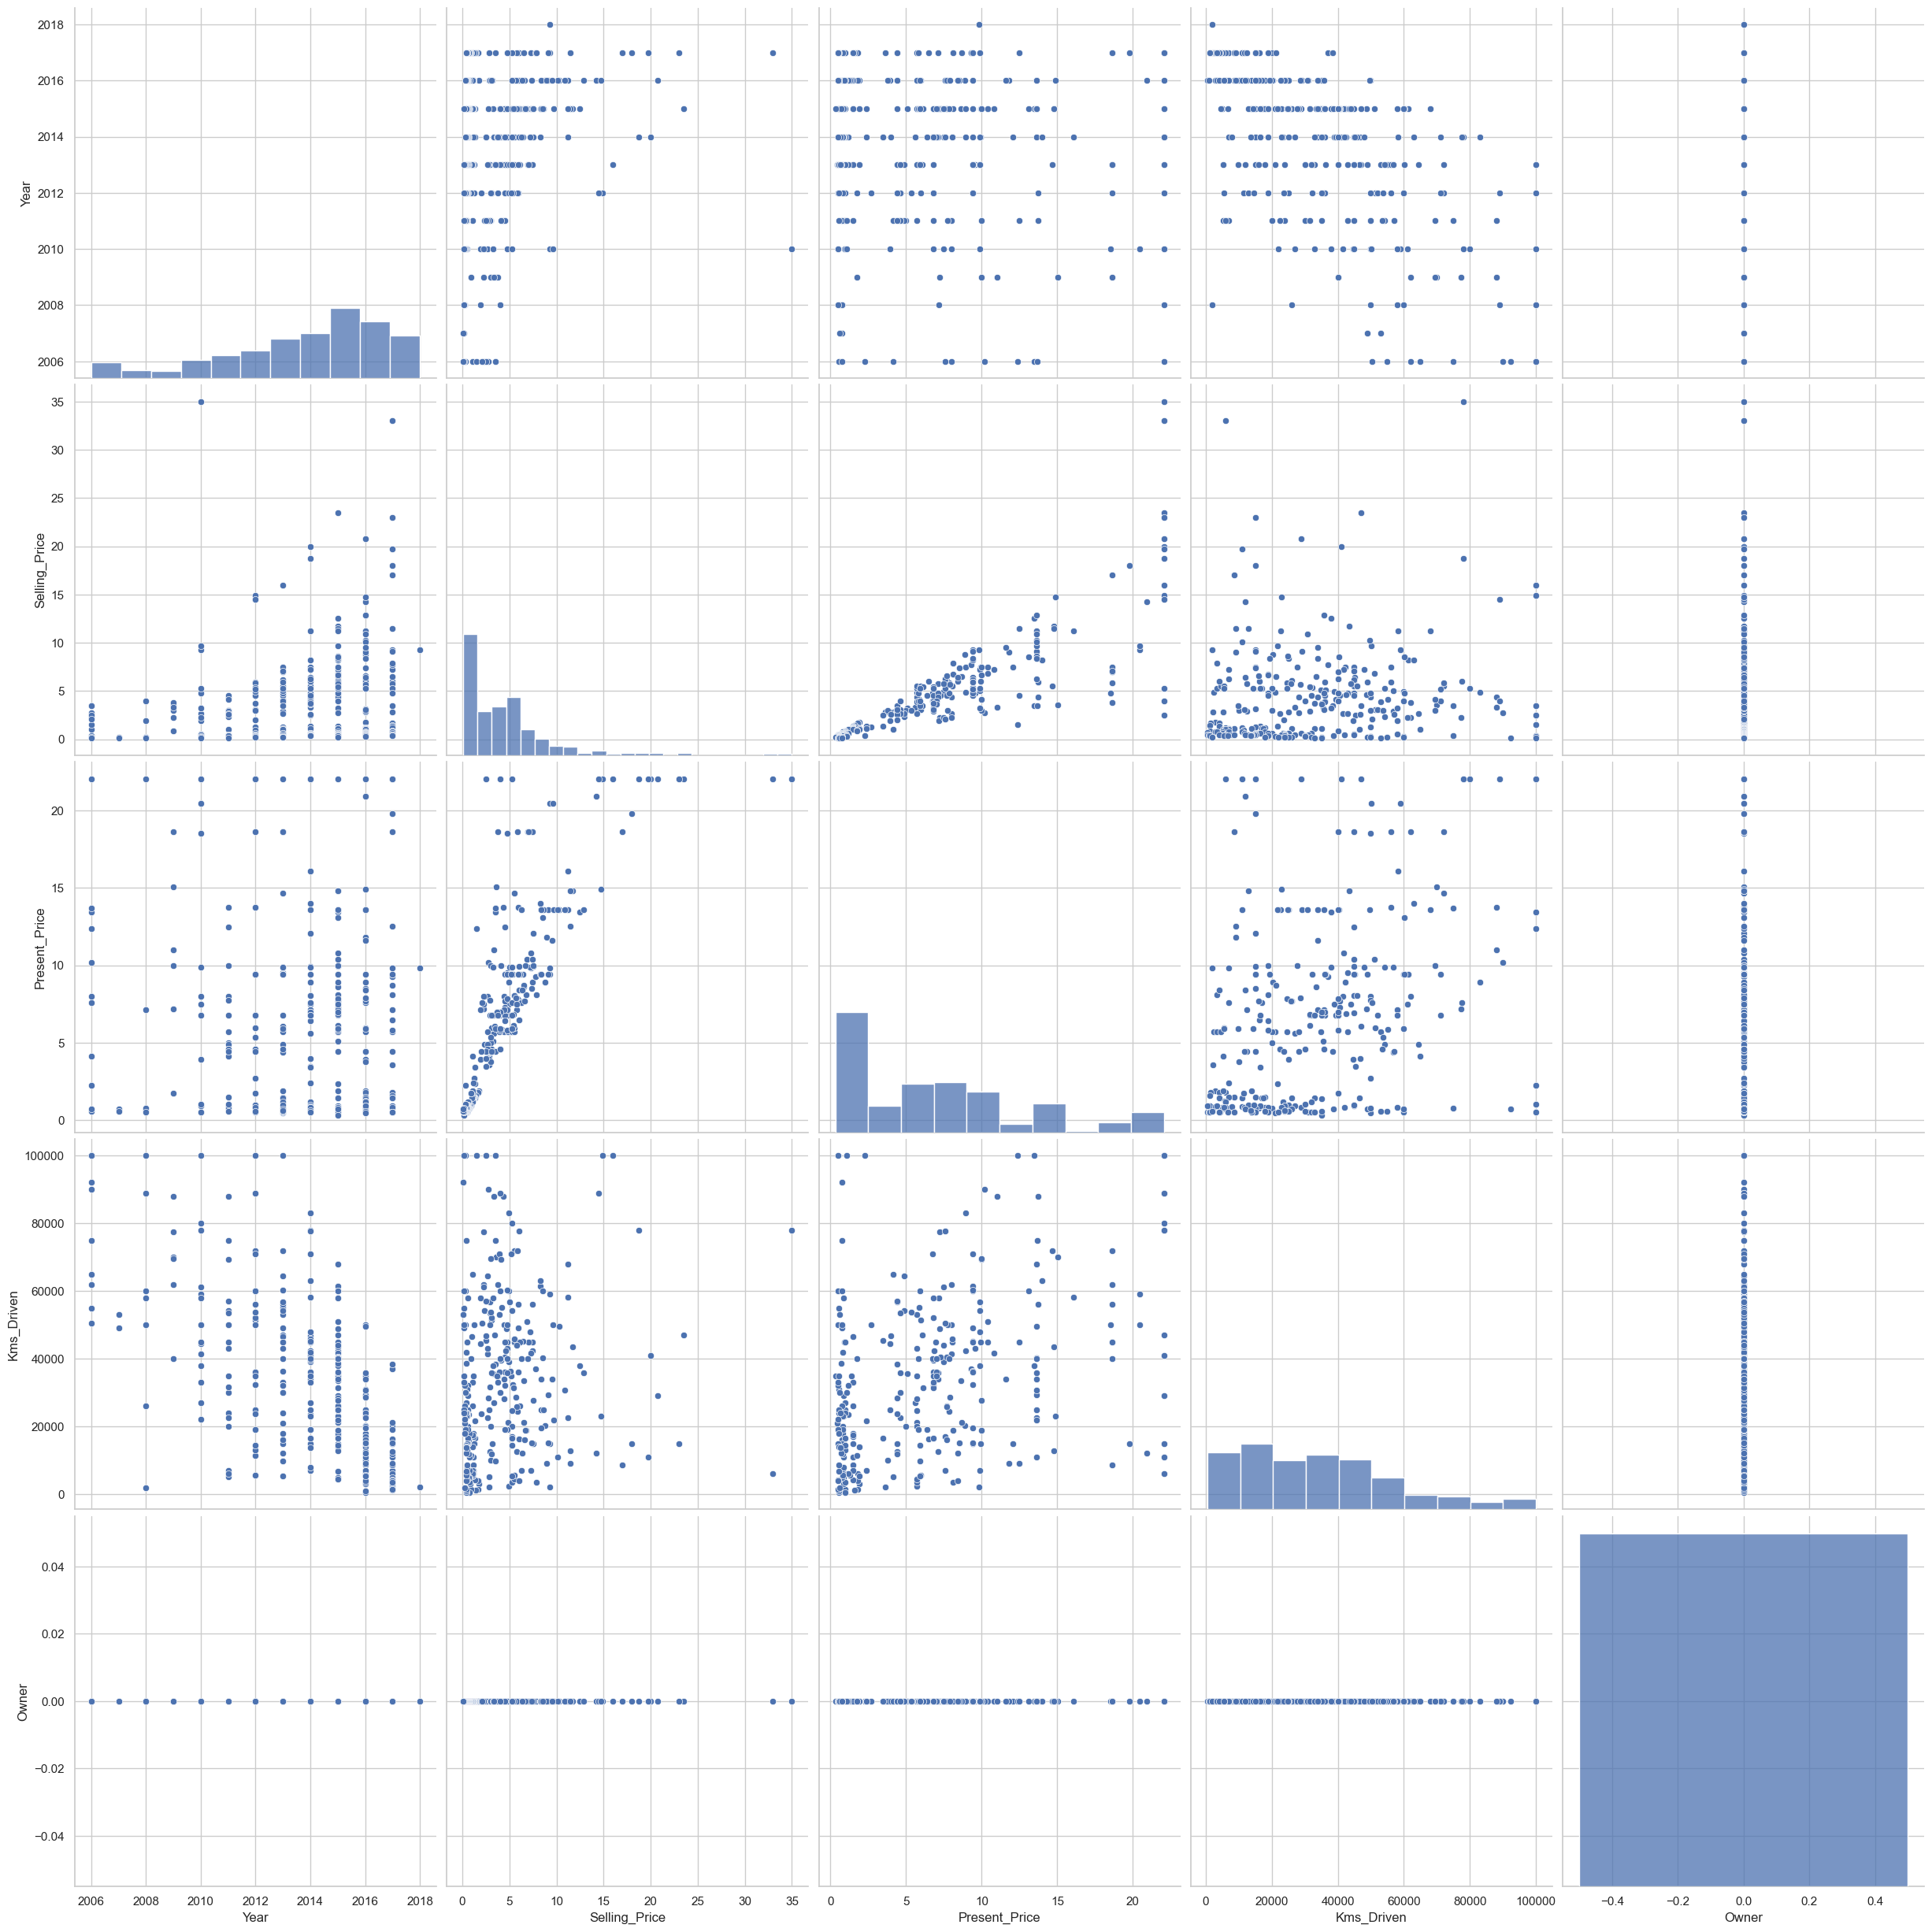

In [26]:
#Pair plots

sns.pairplot(car, size = 5, kind = 'scatter') 

## Encoding

In [27]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
car['Fuel_Type'].value_counts()

Petrol    239
Diesel     56
CNG         2
Name: Fuel_Type, dtype: int64

In [29]:
car['Transmission'].value_counts()

Manual       259
Automatic     38
Name: Transmission, dtype: int64

In [30]:
car['Owner'].value_counts()

0    297
Name: Owner, dtype: int64

In [31]:
# Label Encoder

car['Fuel_Type'] = car['Fuel_Type'].astype('category')
car['Fuel_Type'] = car['Fuel_Type'].cat.codes

car['Seller_Type'] = car['Seller_Type'].astype('category')
car['Seller_Type'] = car['Seller_Type'].cat.codes

# One Hot Encoder 

car = pd.get_dummies(car, columns=['Seller_Type'])

car = pd.get_dummies(car, columns=['Transmission'])

car = pd.get_dummies(car, columns=['Owner'])

In [32]:
car = car.drop(['Transmission_Automatic','Owner_0','Seller_Type_0'], axis=1) 

In [33]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type_1,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,2,0,1
1,sx4,2013,4.75,9.54,43000,1,0,1
2,ciaz,2017,7.25,9.85,6900,2,0,1
3,wagon r,2011,2.85,4.15,5200,2,0,1
4,swift,2014,4.60,6.87,42450,1,0,1


## Feature Scaling

In [34]:
# split the data into independent variable and dependent variable
x = car.drop(['Car_Name','Selling_Price'],axis=1)
y = car['Selling_Price']

In [35]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type_1,Transmission_Manual
0,2014,5.59,27000,2,0,1
1,2013,9.54,43000,1,0,1
2,2017,9.85,6900,2,0,1
3,2011,4.15,5200,2,0,1
4,2014,6.87,42450,1,0,1


In [36]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5
0,0.128696,-0.221149,-0.307742,0.483368,-0.744966,0.383038
1,-0.231895,0.444033,0.362442,-1.909305,-0.744966,0.383038
2,1.210467,0.496237,-1.149662,0.483368,-0.744966,0.383038
3,-0.953076,-0.463645,-1.220869,0.483368,-0.744966,0.383038
4,0.128696,-0.005596,0.339405,-1.909305,-0.744966,0.383038
...,...,...,...,...,...,...
292,0.849876,0.790938,-0.015039,-1.909305,-0.744966,0.383038
293,0.489286,-0.168945,1.074514,0.483368,-0.744966,0.383038
294,-1.674256,0.689897,2.244573,0.483368,-0.744966,0.383038
295,1.210467,0.942498,-1.061700,-1.909305,-0.744966,0.383038


## Finding correlation

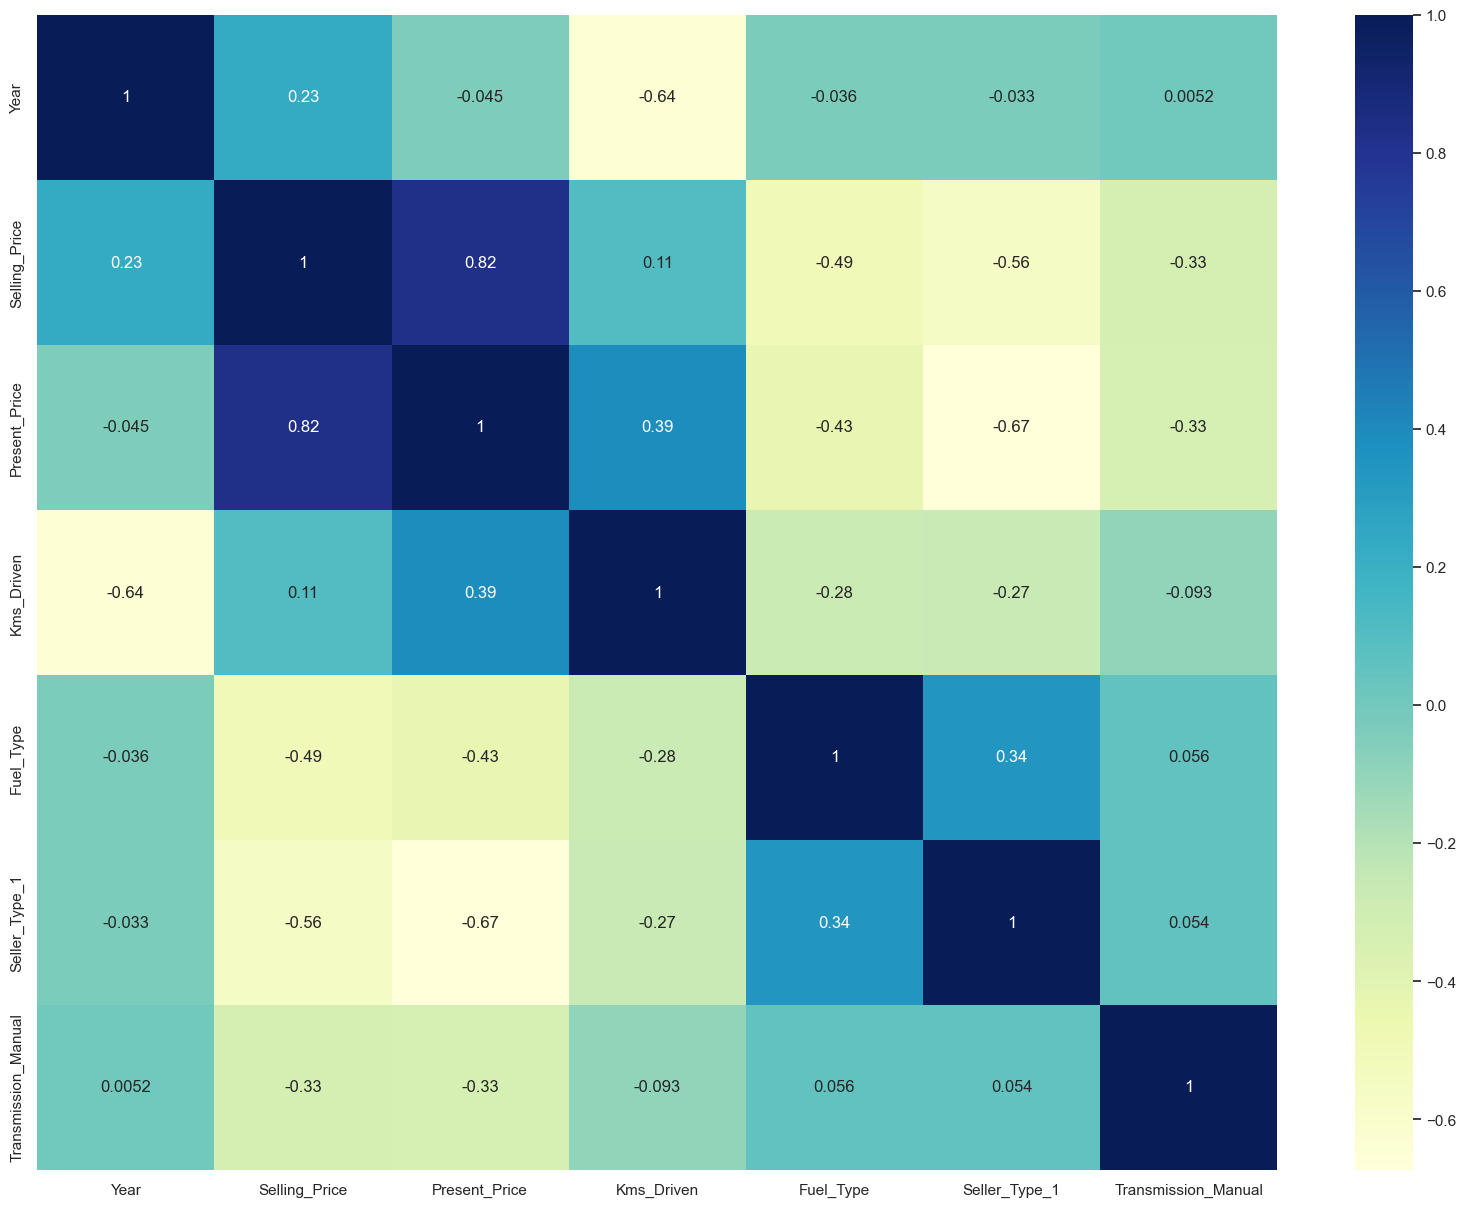

In [38]:
plt.figure(figsize=(20,15))
corr = car.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

## VIF - Variance Inflation Factor  ( to check multicollinearity)

In [39]:
variable = sc_x
variable.shape

(297, 6)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [41]:
vif

,Variance Inflation Factor,Features
0,1.983920,Year
1,2.562714,Present_Price
2,2.351141,Kms_Driven
3,1.324415,Fuel_Type
4,1.975662,Seller_Type_1
5,1.207843,Transmission_Manual


### Split the data into training and test for building the model and for prediction

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(267, 6) (30, 6) (267,) (30,)


# Linear Regression 

## Approach no - 1

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [44]:
print(lm.intercept_)
print()
print(lm.coef_)

-551.785531223224

[ 2.77169715e-01  6.44982956e-01 -2.93641386e-05 -2.33346191e+00
  8.81285048e-02 -1.19395715e+00]


In [45]:
# Predict selling price by using lm model with test dataset

y_pred_price = lm.predict(x_test)
y_pred_price_train = lm.predict(x_train)

In [46]:
y_pred_price

array([ 8.88822834,  4.4747697 , -0.25928022,  2.50491382,  1.33653492,
        6.19322049,  8.01518926,  1.09669301,  0.66031415,  4.70156723,
        8.43825228,  1.52629922,  6.09138103,  8.44415608,  5.62421714,
        6.76112816,  3.63707214,  6.43455481, -0.22264225,  8.91955305,
        1.54123831,  2.18013459,  2.7434277 ,  4.06052973,  5.05991459,
        0.59487513,  1.7689446 , 11.71279859, 17.11875745,  7.75802376])

In [47]:
# Validate the actual price of the test data and predicted price

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_price)

0.7564489097398766

In [48]:
r2_score(y_train, y_pred_price_train)

0.7857015229799365

## Approach no 2 - OLS Method

In [49]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [50]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()

In [51]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              309.6
Date:                Fri, 11 Aug 2023   Prob (F-statistic):                   1.41e-115
Time:                        20:04:37   Log-Likelihood:                         -607.85
No. Observations:                 267   AIC:                                      1228.
Df Residuals:                     261   BIC:                                      1249.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year                    0.0039      0.001      7.125      0.000       0.003       0.005
Present_Price           0.6563      0.039     16.878      0.000       0.580       0.733
Kms_Driven          -5.363e-05   6.63e-06     -8.089      0.000   -6.67e-05   -4.06e-05
Fuel_Type              -2.6753      0.407     -6.574      0.000      -3.477      -1.874
Seller_Type_1          -0.1055      0.421     -0.251      0.802      -0.934       0.723
Transmission_Manual    -1.2727      0.477     -2.670      0.008      -2.211      -0.334
==============================================================================
Omnibus:                      214.194   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8238.353
Skew:                           2.755   Prob(JB):                         0.00
Kurtosis:                      29.649   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Lasso Regularization (L1 - Regularization)

In [52]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Model :", (lasso.coef_))

Lasso Model : [ 2.85799746e-01  6.79778301e-01 -2.69952914e-05 -1.47777073e+00
  0.00000000e+00 -1.36332863e-01]


In [53]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [54]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_lasso))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lasso))

Training Accuracy : 0.777991797308078

Test Accuracy : 0.7886203090155269


## Ridge Regression (L2 - Regularization)

In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))

Ridge Model : [ 2.77968481e-01  6.45856007e-01 -2.92536686e-05 -2.31132688e+00
  8.94330979e-02 -1.17803735e+00]


In [56]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [57]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))

Training Accuracy : 0.7856983656070035

Test Accuracy : 0.7574686092905991


## ElasticNet 
### (L1- Regularization + L2- Regularization)

In [58]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [59]:
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)

In [60]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_elastic))

Training Accuracy : 0.7687033386771955

Test Accuracy : 0.7895248686762874


## Performance Matrix

### Mean Absolute Error (MAE)

In [61]:
from sklearn import metrics

In [62]:
print("MAE :", metrics.mean_absolute_error(y_test, y_pred_price))

MAE : 1.2843754119933342


### Mean Absolute Percent Error (MAPE)

In [63]:
print("MAPE :", metrics.mean_absolute_error(y_test, y_pred_price)/100)

MAPE : 0.012843754119933342


### Mean Squared Error (MSE)

In [64]:
print("MSE :", metrics.mean_squared_error(y_test, y_pred_price))

MSE : 4.014650600732763


### Root Mean Squared Error (MSE)

In [65]:
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_price)))

RMSE : 2.0036593025593854


# Gradient Descent 

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(222, 6) (75, 6) (222,) (75,)


In [67]:
from sklearn.linear_model import SGDRegressor

In [68]:
gd_model = SGDRegressor()
gd_model.fit(x_train, y_train)

SGDRegressor()

In [69]:
y_pred_gd_train = gd_model.predict(x_train)

y_pred_gd_test = gd_model.predict(x_test)

In [70]:
print("GD Trainging Accuracy :", r2_score(y_train, y_pred_gd_train))

print()

print("GD Test Accuracy :", r2_score(y_test, y_pred_gd_test))

GD Trainging Accuracy : 0.7880810276204224

GD Test Accuracy : 0.7167233857543006


# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [72]:
y_pred_DT_train = dtree.predict(x_train)
y_pred_DT_test = dtree.predict(x_test)

In [73]:
# Evaluate the model
from sklearn.metrics import r2_score

In [74]:
print(r2_score(y_train, y_pred_DT_train))
print()
print(r2_score(y_test, y_pred_DT_test))

1.0

0.9298870446456924


<Axes: xlabel='Selling_Price'>

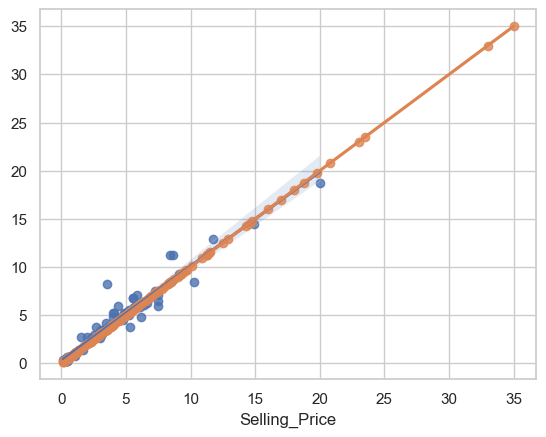

In [75]:
sns.regplot(x=y_test, y=y_pred_DT_test)
sns.regplot(x=y_train, y=y_pred_DT_train)

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [77]:
y_pred_RF_train = rf.predict(x_train)
y_pred_RF_test = rf.predict(x_test)

In [78]:
print(r2_score(y_train, y_pred_RF_train))
print()
print(r2_score(y_test, y_pred_RF_test))

0.9718074632167586

0.9411645711757195


<Axes: xlabel='Selling_Price'>

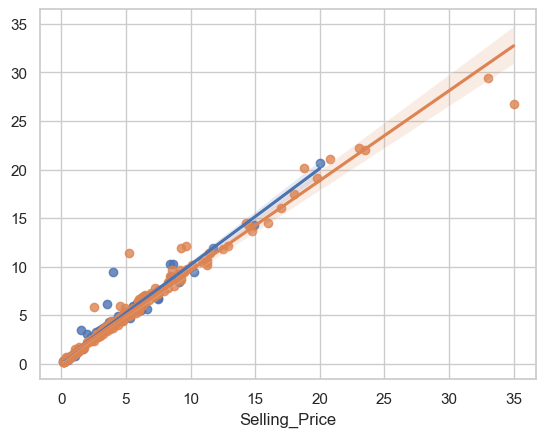

In [79]:
sns.regplot(x=y_test, y=y_pred_RF_test)
sns.regplot(x=y_train, y=y_pred_RF_train)

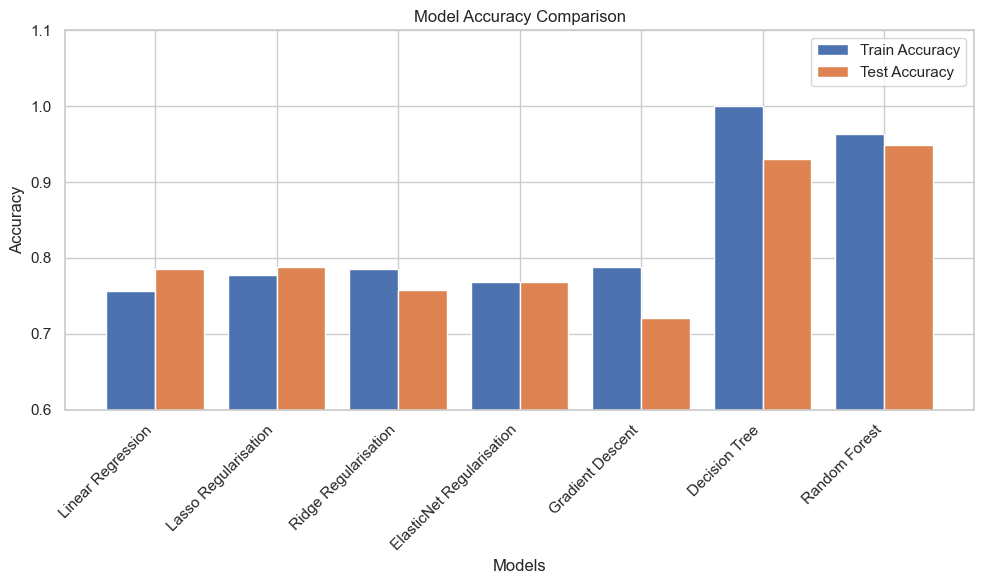

In [80]:
#Model Accuracy Comparison

model_names = ["Linear Regression", "Lasso Regularisation", "Ridge Regularisation", "ElasticNet Regularisation", "Gradient Descent","Decision Tree","Random Forest"]
accuracy_data = {
    'train_accuracies': [0.7564489097398766, 0.777991797308078, 0.7856983656070035, 0.7687033386771955, 0.7881337209765821, 1.0, 0.9634703096914375],
    'test_accuracies': [0.7857015229799365, 0.7886203090155269, 0.7574686092905991, 0.7687033386771955, 0.720695948910556, 0.9307573063238717, 0.9491247935594443]
}

x = list(range(len(model_names)))

plt.figure(figsize=(10, 6))
plt.bar(x, accuracy_data['train_accuracies'], width=0.4, label='Train Accuracy')
plt.bar([i + 0.4 for i in x], accuracy_data['test_accuracies'], width=0.4, label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks([i + 0.2 for i in x], model_names, rotation=45, ha='right')
plt.ylim(0.6, 1.1)
plt.legend()
plt.tight_layout()

plt.show()

# Conclusion

Here's a simplified conclusion with bullet points highlighting the performance of each model:

- **Linear Regression**: Shows steady accuracy on both training and testing.
- **Lasso Regularization**: Performs well with consistent accuracy scores.
- **Ridge Regularization**: Also does well with steady accuracy on both datasets.
- **ElasticNet Regularization**: Maintains similar accuracy on both training and testing.
- **Gradient Descent**: Has okay accuracy but not the highest.
- **Decision Tree**: Perfect on training but drops on testing (overfitting risk).
- **Random Forest**: Stands out with high accuracy on both training and testing.

 In terms of the best performer, the **Random Forest** model demonstrates strong overall performance on both training and testing data.